# Friend Recommendation#

In [2]:
library('igraph')
library('Matrix')
library('stringr')


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



# question 16

 [1]  31  53  75  90  93 102 118 133 134 136 137
[1] "Nr has 11 nodes"


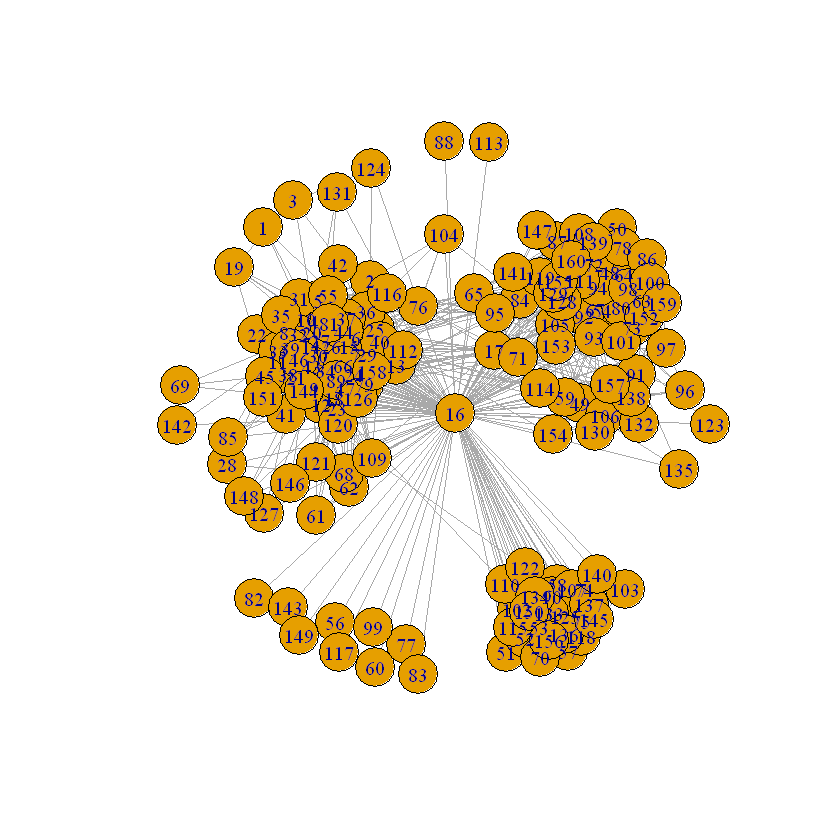

In [3]:
# create 415's personal network
facebook_filepath = "E:/Quarter 3/Large Scale Social and Complex Networks Design and Algorithms/project2/facebook/facebook_combined.txt"
FB = read_graph(facebook_filepath,format="edgelist",directed=FALSE)
neighbors415 = neighborhood(FB, order = 1, nodes = 415)
personal_network = induced_subgraph(FB, vids=unlist(neighbors415))
degree24_nodes = c()
nodes415 = V(personal_network)
for(neighbor in unlist(nodes415)){
    if(length(neighbors(personal_network, neighbor))==24)
        degree24_nodes = append(degree24_nodes, neighbor)
}
print(degree24_nodes)
print(paste("Nr has ", length(degree24_nodes)," nodes", sep=""))
FB = personal_network
plot(personal_network)

# question 17

In [43]:
#Gnerate a list of all neighbors of each vertex
neighbor_list = matrix(list(), nrow=length(V(FB)))
for(vid in V(FB)){
    neighbor_list[vid] = list(neighbors(personal_network, vid))
}

# method 1: common neighbors

In [44]:
#First we randomly delete edges of vertex from degree24_nodes
accuracy = 0.0
for(node in degree24_nodes){
    for(i in c(1:10)){
        edges = E(FB)[from(node)]
        idx = sample(c(TRUE, FALSE), 24, prob = c(0.25,0.75), repl=TRUE)
        tempFB = delete_edges(FB, edges[idx])
        deleted_friends = V(FB)[inc(edges[idx])]
        deleted_friends = deleted_friends[deleted_friends!=node]
#Then find the neighbor of node now
        neighbor_of_node = neighbors(tempFB, node)

#Finding common neighbors between node and other vertex and sort
        common_list = c()
        neighbor_node = 1
        for(neighbor in neighbor_list){
            if(neighbor_node %in% neighbor_of_node){
                common_list = append(common_list, 0)
                neighbor_node = neighbor_node+1
                next
            }
            neighbor_node = neighbor_node+1
            neighbor = as.integer(unlist(neighbor))
            common = 0
            for(nn in neighbor_of_node){
                if(nn %in% neighbor )
                    common = common+1
            }
            common_list = append(common_list, common)

        }
#Comparing deleted_nodes and recommended friends, give accuracy
            sorted_common_list = sort.int(common_list, index.return=TRUE, decreasing = TRUE)
            recommended_friends = sorted_common_list$ix[1:length(deleted_friends)]
            if(node %in% recommended_friends){
                recommended_friends = recommended_friends[recommended_friends!=node]
                recommended_friends = append(recommended_friends, sorted_common_list$ix[length(deleted_friends)+1])
            }
            if(length(deleted_friends)!=0)
                accuracy = accuracy + length(intersect(deleted_friends, recommended_friends))/length(deleted_friends)
    }
}
print("total accuracy")
print(accuracy/(10.0*length(degree24_nodes)))





[1] "total accuracy"
[1] 0.8371809


# method 2 Jaccard measure

In [45]:
#First we randomly delete edges of vertex from degree24_nodes
accuracy = 0.0

for(node in degree24_nodes){
    for(i in c(1:10)){
        edges = E(FB)[from(node)]
        idx = sample(c(TRUE, FALSE), 24, prob = c(.25,.75), repl=T)
        tempFB = delete_edges(FB, edges[idx])
        deleted_friends = V(FB)[inc(edges[idx])]
        deleted_friends = deleted_friends[deleted_friends!=node]
#Then find the neighbor of node now
        neighbor_of_node = neighbors(tempFB, node)

#Finding common neighbors between node and other vertex and sort
        common_list = c()
        neighbor_node = 1
        for(neighbor in neighbor_list){
            if(neighbor_node %in% neighbor_of_node){
                common_list = append(common_list, 0)
                neighbor_node = neighbor_node+1
                next
            }
            neighbor_node = neighbor_node+1
            neighbor = as.integer(unlist(neighbor))
            common = 0
            for(nn in neighbor_of_node){
                if(nn %in% neighbor )
                    common = common+1
            }
            common_list = append(common_list, 1.0*common/(length(neighbor)+length(neighbor_of_node)-common))

        }
#Comparing deleted_nodes and recommended friends, give accuracy
            sorted_common_list = sort.int(common_list, index.return=TRUE, decreasing = TRUE)
            recommended_friends = sorted_common_list$ix[1:length(deleted_friends)]
            if(node %in% recommended_friends){
                recommended_friends = recommended_friends[recommended_friends!=node]
                recommended_friends = append(recommended_friends, sorted_common_list$ix[length(deleted_friends)+1])
            }
            if(length(deleted_friends)!=0)
                accuracy = accuracy + length(intersect(deleted_friends, recommended_friends))/length(deleted_friends)
    }
}
print("total accuracy:")
print(accuracy/(10.0*length(degree24_nodes)))





[1] "total accuracy:"
[1] 0.803539


# method 3 Adamic-Adar measure

In [46]:
#First we randomly delete edges of vertex from degree24_nodes
accuracy = 0.0

for(node in degree24_nodes){
    for(i in c(1:10)){
        edges = E(FB)[from(node)]
        idx = sample(c(TRUE, FALSE), 24, prob = c(.25,.75), repl=T)
        tempFB = delete_edges(FB, edges[idx])
        deleted_friends = V(FB)[inc(edges[idx])]
        deleted_friends = deleted_friends[deleted_friends!=node]
#Then find the neighbor of node now
        neighbor_of_node = neighbors(tempFB, node)

#Finding common neighbors between node and other vertex and sort
        common_list = c()
        neighbor_node = 1
        for(neighbor in neighbor_list){
            if(neighbor_node %in% neighbor_of_node){
                common_list = append(common_list, 0)
                neighbor_node = neighbor_node+1
                next
            }
            neighbor_node = neighbor_node+1
            neighbor = as.integer(unlist(neighbor))
            common = 0
            for(nn in neighbor_of_node){
                if(nn %in% neighbor ){
                    common = common+1.0/log(length(neighbors(tempFB, nn)))
                }
            }
            common_list = append(common_list, common)
        }
        
#Comparing deleted_nodes and recommended friends, give accuracy
            sorted_common_list = sort.int(common_list, index.return=TRUE, decreasing = TRUE)
            recommended_friends = sorted_common_list$ix[1:length(deleted_friends)]
            if(node %in% recommended_friends){
                recommended_friends = recommended_friends[recommended_friends!=node]
                recommended_friends = append(recommended_friends, sorted_common_list$ix[length(deleted_friends)+1])
            }
            if(length(deleted_friends)!=0)
                accuracy = accuracy + length(intersect(deleted_friends, recommended_friends))/length(deleted_friends)
    }

}
print("total accuracy:")
print(accuracy/(10.0*length(degree24_nodes)))

[1] "total accuracy:"
[1] 0.8281182


# question 18

In [3]:
google_filepath = "E:/Quarter 3/Large Scale Social and Complex Networks Design and Algorithms/project2/google+/gplus"
file_names = list.files(path=google_filepath, pattern="circle")
num_personal_networks = 0
circle_file_over_two = character()
for( circle_file in file_names ){
    circle_path = paste("E:/Quarter 3/Large Scale Social and Complex Networks Design and Algorithms/project2/google+/gplus/", circle_file,sep="")
    circle_connect = file(circle_path, open="r")
    circle_content = readLines(circle_connect)
    close(circle_connect)
    if(length(circle_content)>2){
        num_personal_networks = num_personal_networks+1
        circle_file = str_replace_all(circle_file, fixed(".circles"),"")
        circle_file_over_two = c(circle_file_over_two, circle_file)
    }
}
print(paste("There are ", num_personal_networks," that have more than 2 circles", sep=""))


[1] "There are 57 that have more than 2 circles"


# question 19 and question 20

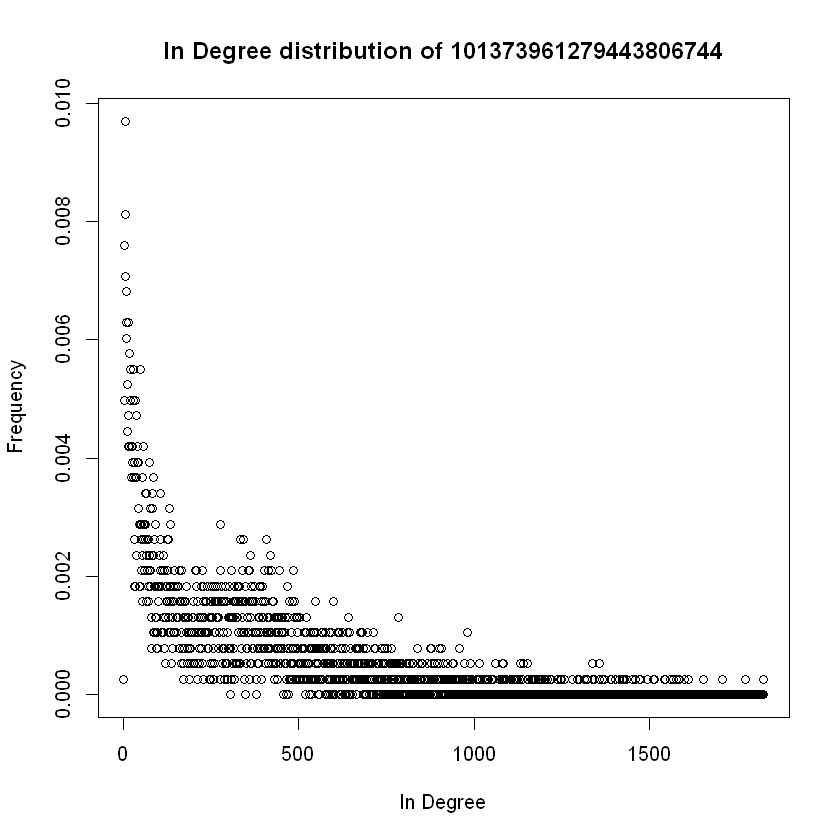

[1] "The modularity score for 101373961279443806744 is: 0.191090270876884"


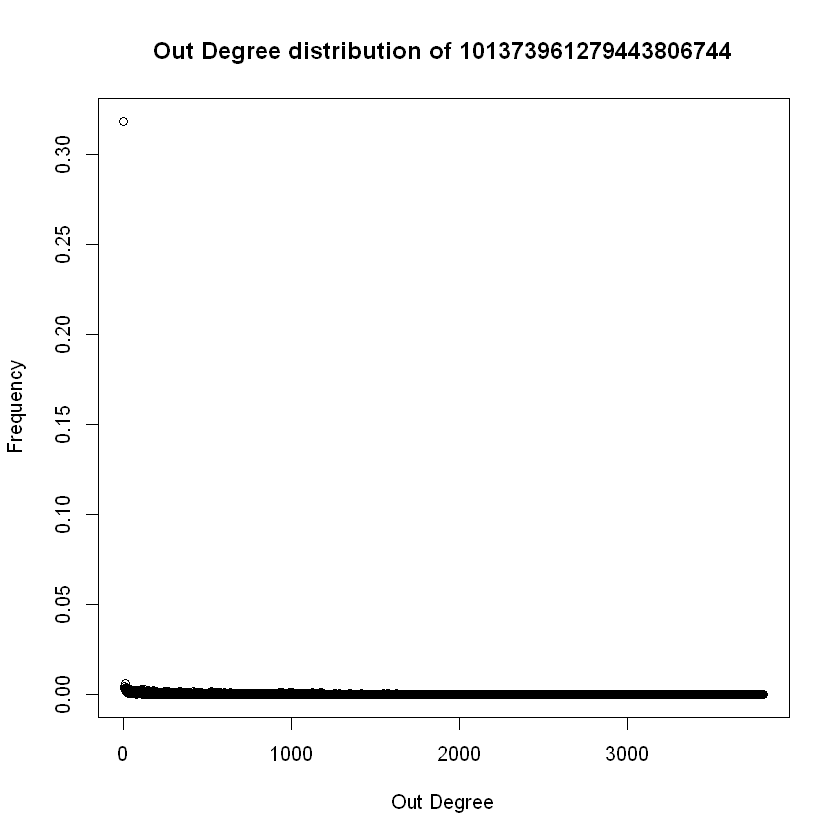

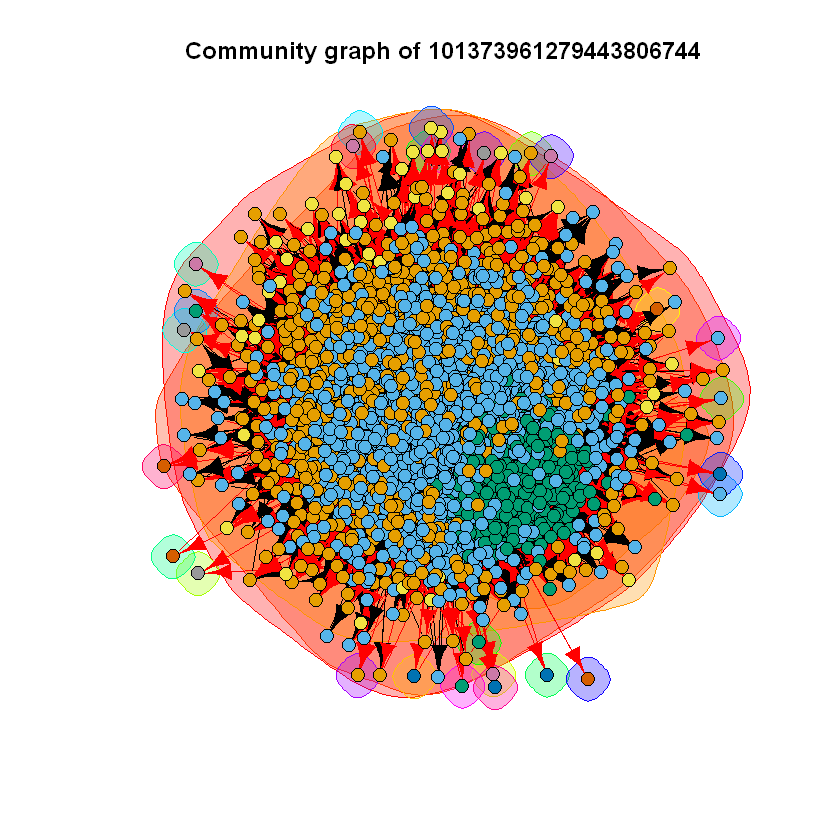

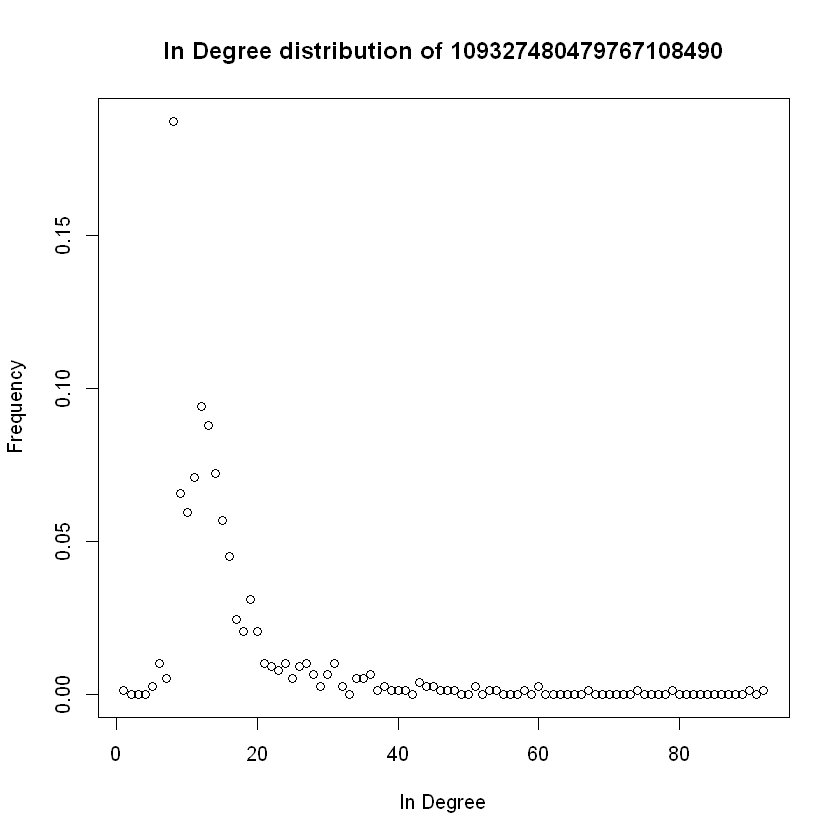

[1] "The modularity score for 109327480479767108490 is: 0.252765387296677"


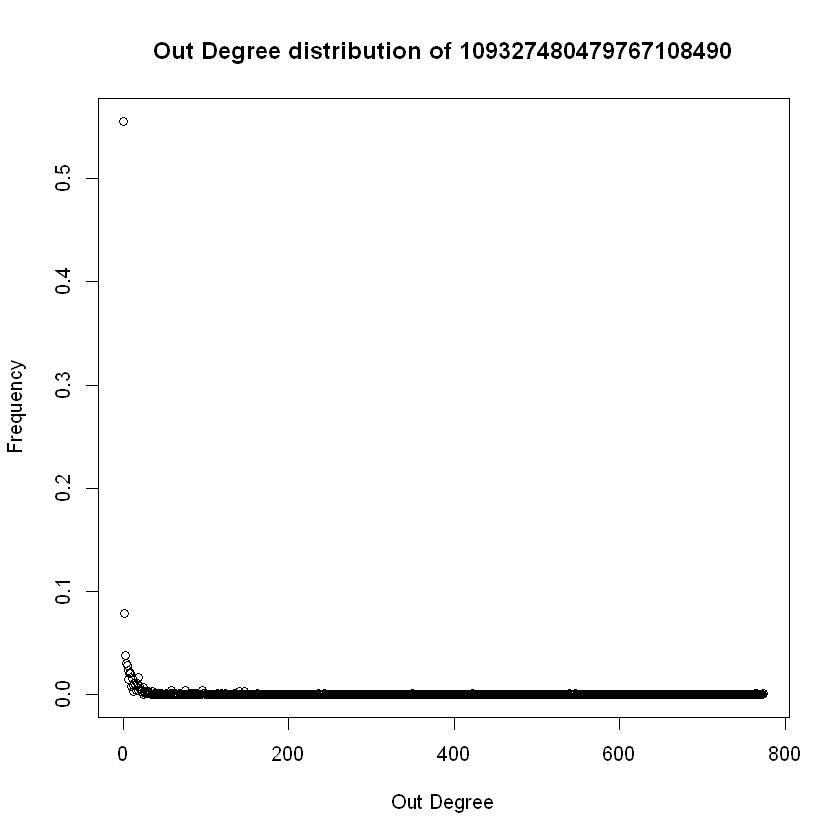

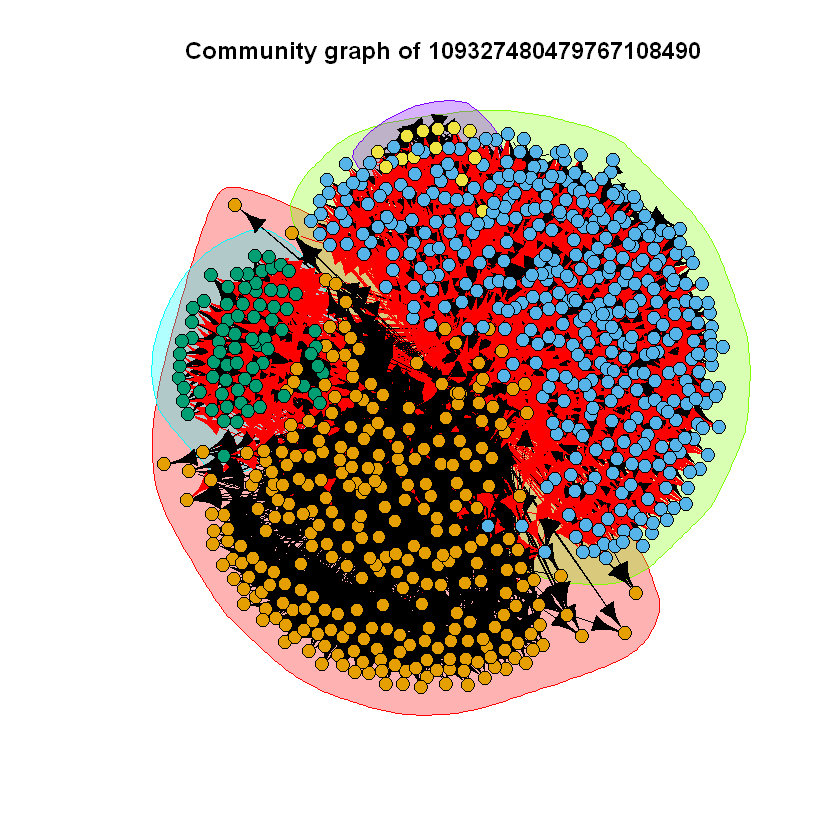

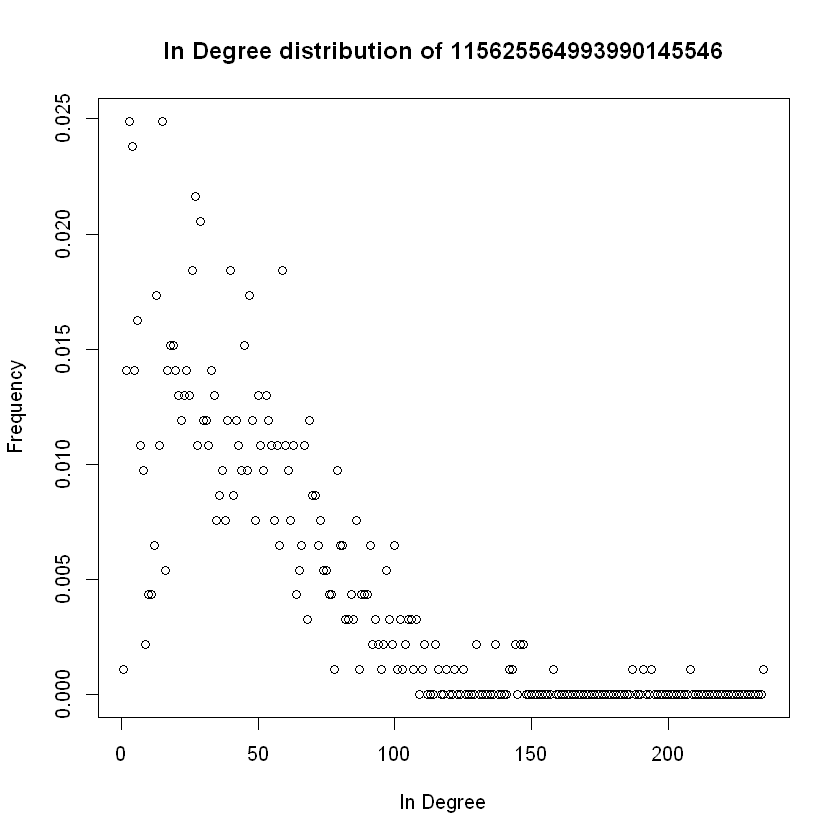

[1] "The modularity score for 115625564993990145546 is: 0.319472551345825"


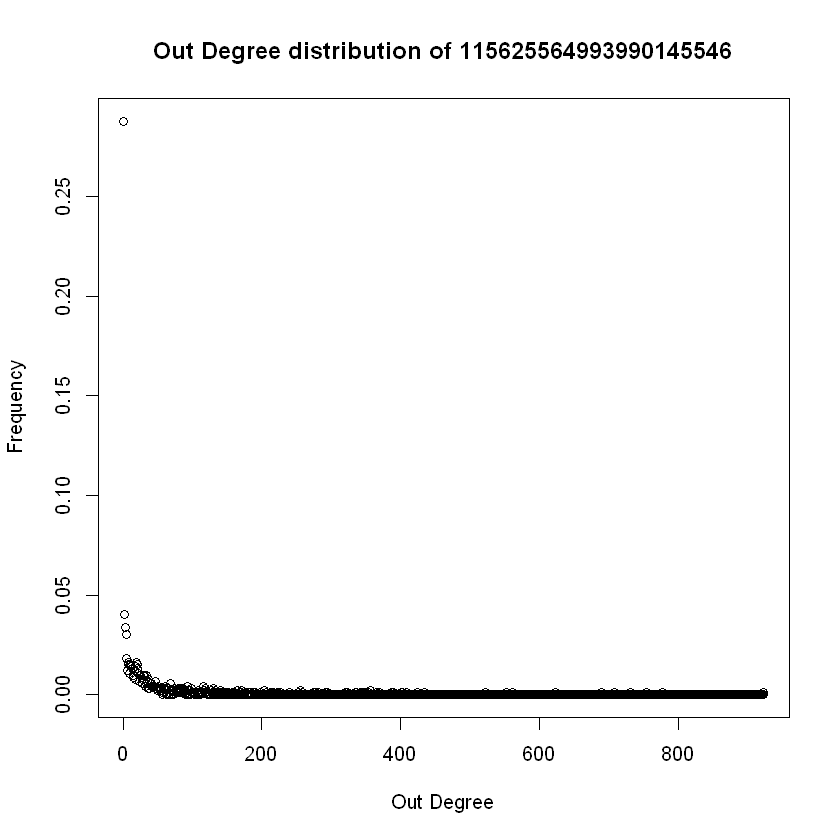

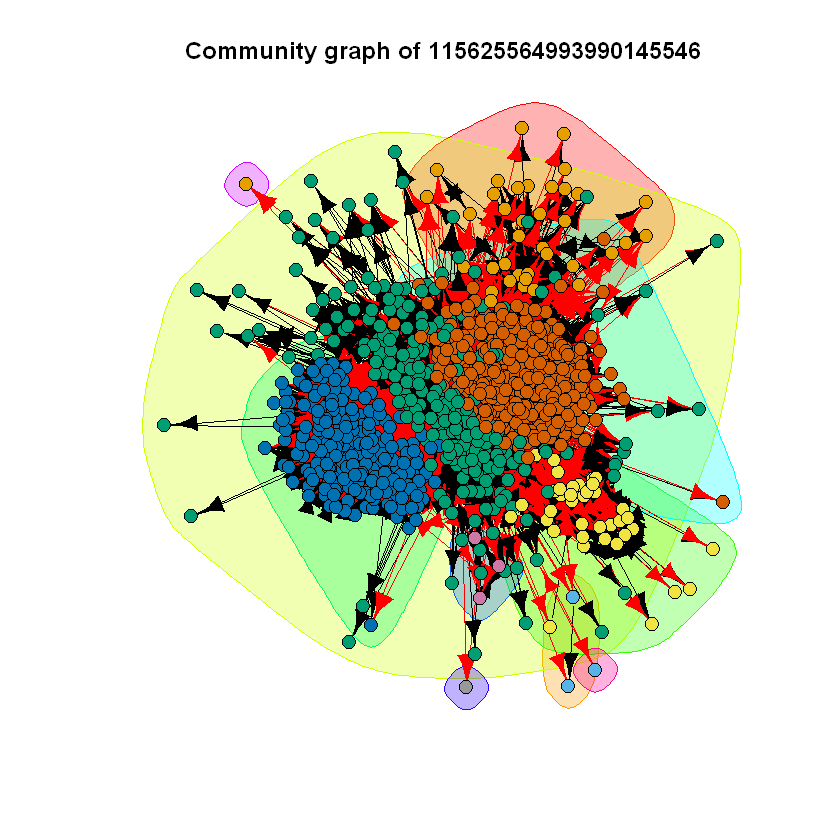

In [37]:
# create graph file for 109327480479767108490, 115625564993990145546, 101373961279443806744 and extract community
file_ids = c("109327480479767108490", "115625564993990145546", "101373961279443806744")
for(id in circle_file_over_two){
    if(id %in% file_ids){
        graph_path = paste("E:/Quarter 3/Large Scale Social and Complex Networks Design and Algorithms/project2/google+/gplus/", id, ".edges", sep="")
        network = read.graph(graph_path, format = "ncol", directed=TRUE)
        network = add.vertices(network, nv = 1, name = id)
        ego_node = which(V(network)$name==id)
        ego_edges = c()
        for(vertex in 1:vcount(network)){
            if(vertex != ego_node)
                ego_edges = append(ego_edges, c(ego_node, vertex))
        }
        network = add_edges(network, ego_edges)
# plot in degree and out degree plot
        plot(degree.distribution(network, mode = "in"),main=paste("In Degree distribution of ", id, sep=""), xlab="In Degree",ylab="Frequency")
        plot(degree.distribution(network, mode = "out"),main=paste("Out Degree distribution of ", id, sep=""), xlab="Out Degree",ylab="Frequency")
# counting modularity score and plot community
        community = walktrap.community(network)
        print(paste("The modularity score for ", id, " is: ", modularity(community), sep = ""))
        plot(community, network, vertex.size = 5, vertex.label=NA, ,main=paste("Community graph of ", id, sep=""))
        }
}



In [5]:
# create graph file for 109327480479767108490, 115625564993990145546, 101373961279443806744 and extract community
file_ids = c("109327480479767108490", "115625564993990145546", "101373961279443806744")
for(id in circle_file_over_two){
    if(id %in% file_ids){
        graph_path = paste("E:/Quarter 3/Large Scale Social and Complex Networks Design and Algorithms/project2/google+/gplus/", id, ".edges", sep="")
        network = read.graph(graph_path, format = "ncol", directed=TRUE)
        network = add.vertices(network, nv = 1, name = id)
        ego_node = which(V(network)$name==id)
        ego_edges = c()
        for(vertex in 1:vcount(network)){
            if(vertex != ego_node)
                ego_edges = append(ego_edges, c(ego_node, vertex))
        }
        network = add_edges(network, ego_edges)
# counting modularity score and plot community
        community = walktrap.community(network)
        print(community[[1]])
        break
        }
}



  [1] "104368271871465574510" "108634998661481918916" "110717004259802576923"
  [4] "112794570546887000169" "102961518701176290926" "104361939848148826153"
  [7] "116122135295490410746" "101690113942147319984" "115134249452604246308"
 [10] "116687563390929241056" "115374511271823228898" "103125254078422850688"
 [13] "108163098546093406261" "105379364953109830773" "110103963031915619513"
 [16] "108359434857750473549" "102280187460284438983" "111442489653684253192"
 [19] "104899830915865928532" "115470184314725218073" "106160131570038580166"
 [22] "118268105462405782597" "113177164884799734506" "107243787766415047451"
 [25] "107563811759925445705" "116666017993062150925" "104506173451566117295"
 [28] "113677706140175367048" "101670592154326222488" "116643304160474160340"
 [31] "110001339139979553061" "107268299412858724158" "107646974851275524326"
 [34] "115032003955557981273" "104987624452429967101" "106749686166469577692"
 [37] "118317901266399171915" "115462100032062835128" "109328612